In [1]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np


# Problem Parameters
a = -0.5
b = 0.5


def exact(*x):
    return np.prod(np.cos(np.asarray(x) * 2 * np.pi / (b - a)), axis=0)


def f(*x):
    return (len(x) * (2 * np.pi / (b - a)) ** 2 + 1) * exact(*x)  

In [2]:
# Parameters
d = 1
k = 1
deltas = np.arange(1, 21) / 100
N = 100

# Computed Parameters
ranges = ((a, b),) * d
xc = rad.gridn(ranges, N, flat=True)

# Integration
integrator = rad.integrate.MeanIntegrator(ranges, 2000)
error_integrator = rad.integrate.QuadIntegrator(ranges)

# Data collection
results = np.zeros((np.size(deltas), 2))

for i, delta in enumerate(deltas):
    # Solve for approximate solution
    solver = rad.solve.GalerkinSolver(d, k, delta, xc, integrator, 'helmholtz')
    approx = solver.solve(f)
    error = rad.error(exact, approx, error_integrator)
    cond = solver.cond()
    
    results[i,0] = error
    results[i, 1] = solver.cond()
    
    print("Delta:", delta)
    print("  L2 Relative Error:", error)
    print("  Condition Number:", solver.cond())

/home/keane/Projects/radiant/venv/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:1233: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Delta: 0.01
  L2 Relative Error: 0.9965251303679836
  Condition Number: 7.466148832076036
Delta: 0.02
  L2 Relative Error: 0.5573844099126557
  Condition Number: 199.7707324899647
Delta: 0.03
  L2 Relative Error: 0.93574463687086
  Condition Number: 1999.6989443571288
Delta: 0.04
  L2 Relative Error: 8.087310631833981
  Condition Number: 22882.337916149547
Delta: 0.05
  L2 Relative Error: 0.7330178105034237
  Condition Number: 7385.334607834178
Delta: 0.06
  L2 Relative Error: 0.29332733691946844
  Condition Number: 13045.455375621828
Delta: 0.07
  L2 Relative Error: 0.1446800306881745
  Condition Number: 52753.627526612094
Delta: 0.08
  L2 Relative Error: 0.08398773848074427
  Condition Number: 86326.30220694265
Delta: 0.09
  L2 Relative Error: 0.059846154234768696
  Condition Number: 222926.95663263067
Delta: 0.1
  L2 Relative Error: 0.05274765718546532
  Condition Number: 341122.1051713184
Delta: 0.11
  L2 Relative Error: 0.05210737570820813
  Condition Number: 687044.6336757783
Del

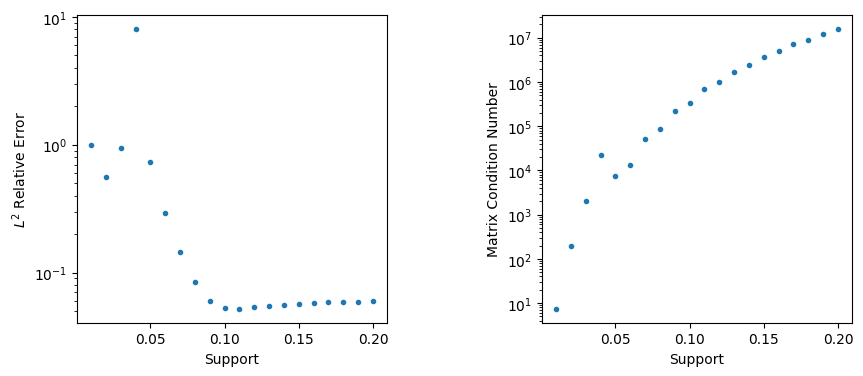

In [3]:
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1, 2, figsize=(10,4))

axs[0].set_xlabel("Support")
axs[0].set_ylabel(r"$L^{2}$ Relative Error")
axs[0].set_yscale('log')
axs[0].plot(deltas, results[:, 0], '.')

axs[1].set_xlabel("Support")
axs[1].set_ylabel("Matrix Condition Number")
axs[1].set_yscale('log')
axs[1].plot(deltas, results[:, 1], '.')

plt.subplots_adjust(wspace=0.5)
plt.show()